In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/loantrain.csv')

# Drop rows with missing target
target = 'Loan Sanction Amount (USD)'
df = df.dropna(subset=[target])

# Split numerical and categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [col for col in numerical_features if col != target]

# Impute numerical features
num_imputer = SimpleImputer(strategy='mean')
X_num = num_imputer.fit_transform(df[numerical_features])
num_feature_names = numerical_features

# Reshape X_num if it's 1D and not empty
if X_num.ndim == 1 and X_num.size > 0:
  X_num = X_num.reshape(-1, 1)

# Impute and encode categorical features
cat_imputer = SimpleImputer(strategy='most_frequent')
X_cat_imputed = cat_imputer.fit_transform(df[categorical_features])

encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
X_cat = encoder.fit_transform(X_cat_imputed)
cat_feature_names = encoder.get_feature_names_out(categorical_features)

# Combine features
X_all = np.hstack((X_num, X_cat.toarray()))
feature_names = num_feature_names + list(cat_feature_names)
y = df[target].values

# Standardize the combined features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_test_pred = lr.predict(X_test)

# Evaluation
def evaluate(y_true, y_pred, X_data):
    n = len(y_true)
    k = X_data.shape[1]

    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

    print(f"MAE : {mae:.2f}")
    print(f"MSE : {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²  : {r2:.4f}")
    print(f"Adjusted R²: {adjusted_r2:.4f}")

print("Test Set Evaluation:")
evaluate(y_test, y_test_pred, X_test)

# Plot: Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Loan Amount')
plt.ylabel('Predicted Loan Amount')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

# Plot: Residuals
residuals = y_test - y_test_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

# Feature Importance
coefficients = lr.coef_
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature')
plt.title('Feature Coefficients (Importance)')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/loantrain.csv')

# Drop rows with missing target
target = 'Loan Sanction Amount (USD)'
df = df.dropna(subset=[target])

# Split numerical and categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [col for col in numerical_features if col != target]

# Impute numerical features
num_imputer = SimpleImputer(strategy='mean')
X_num = num_imputer.fit_transform(df[numerical_features])
num_feature_names = numerical_features

# Reshape X_num if it's 1D and not empty
if X_num.ndim == 1 and X_num.size > 0:
  X_num = X_num.reshape(-1, 1)

# Impute and encode categorical features
cat_imputer = SimpleImputer(strategy='most_frequent')
X_cat_imputed = cat_imputer.fit_transform(df[categorical_features])

encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
X_cat = encoder.fit_transform(X_cat_imputed)
cat_feature_names = encoder.get_feature_names_out(categorical_features)

# Combine features
X_all = np.hstack((X_num, X_cat.toarray()))
feature_names = num_feature_names + list(cat_feature_names)
y = df[target].values

# Standardize the combined features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_test_pred = lr.predict(X_test)

# Evaluation
def evaluate(y_true, y_pred, X_data):
    n = len(y_true)
    k = X_data.shape[1]

    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

    print(f"MAE : {mae:.2f}")
    print(f"MSE : {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²  : {r2:.4f}")
    print(f"Adjusted R²: {adjusted_r2:.4f}")

print("Test Set Evaluation:")
evaluate(y_test, y_test_pred, X_test)

# Plot: Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Loan Amount')
plt.ylabel('Predicted Loan Amount')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

# Plot: Residuals
residuals = y_test - y_test_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

# Feature Importance
coefficients = lr.coef_
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature')
plt.title('Feature Coefficients (Importance)')
plt.show()

Dataset size after preprocessing: 30000


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


test
MSE 560.2041903930493
MAE 12.429178532949004
r2 0.9999997659903428
validation
MSE 596521213.4865651
MAE 12960.595886077848
r2 0.7355855423268194
Test Set Evaluation:
MAE : 12.43
MSE : 560.20
RMSE: 23.67
R²  : 1.0000
Adjusted R²: 1.0000

Validation Set Evaluation:
MAE : 12960.60
MSE : 596521213.49
RMSE: 24423.78
R²  : 0.7356
Adjusted R²: 0.7352
Dataset size after preprocessing: 29660


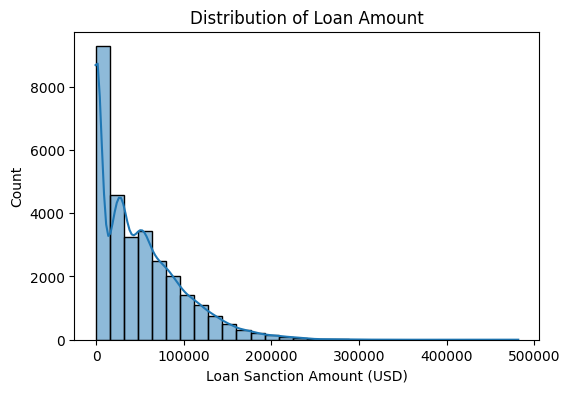

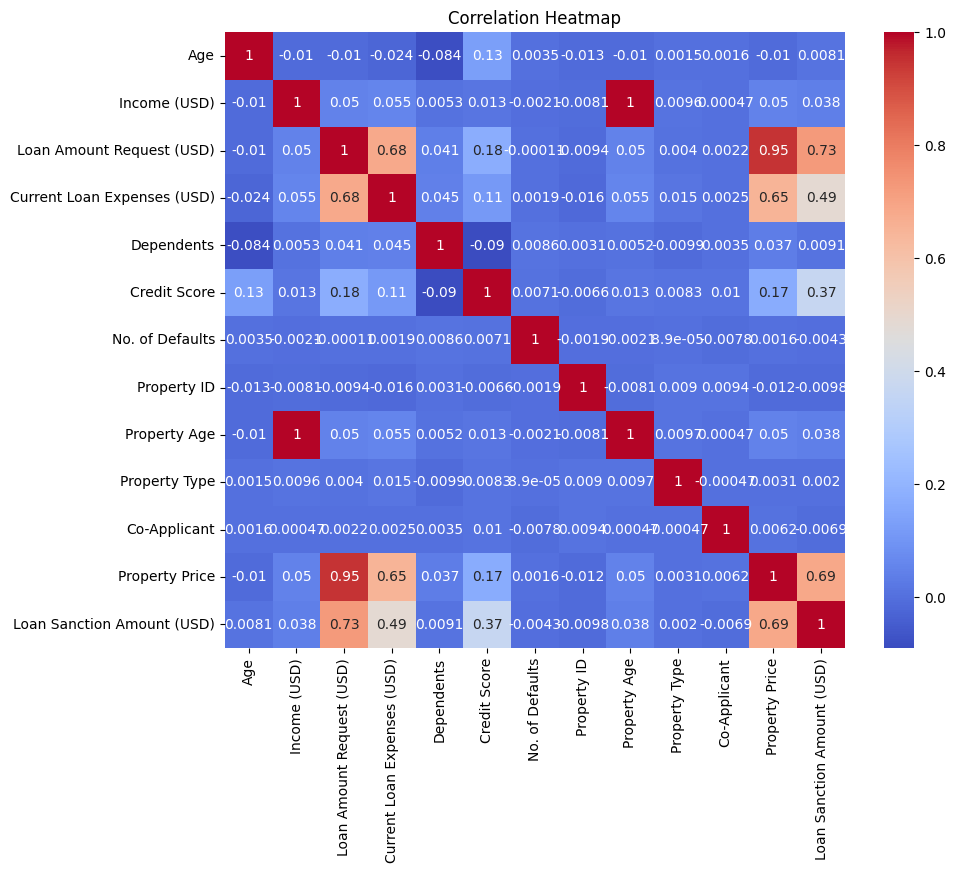

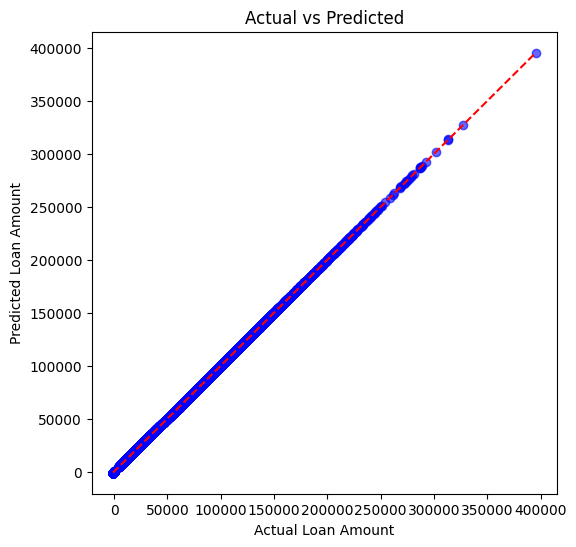

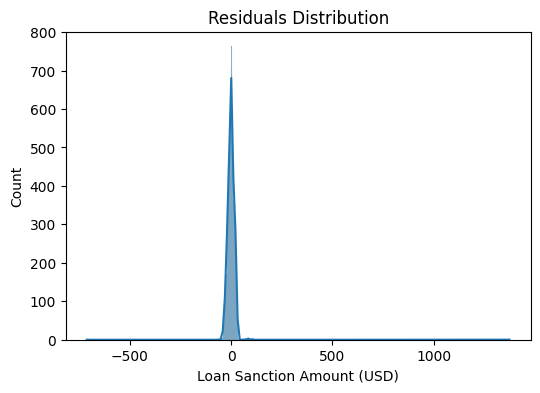

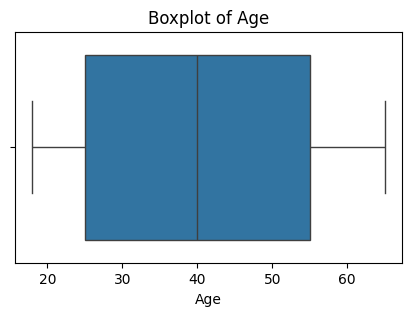

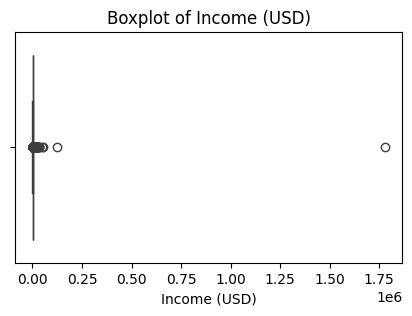

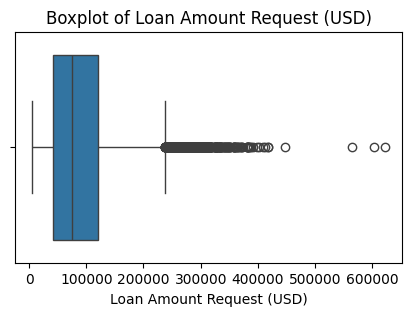

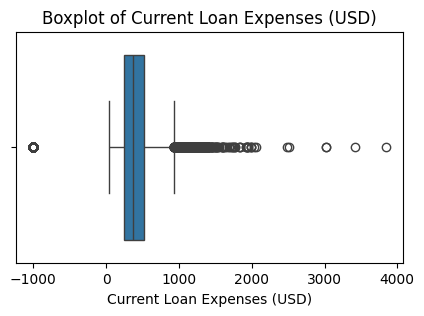

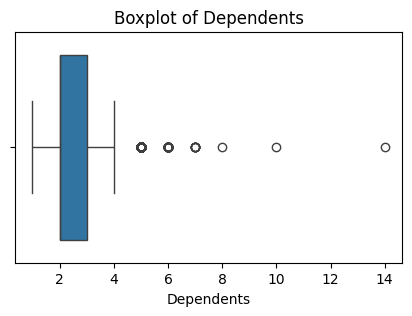

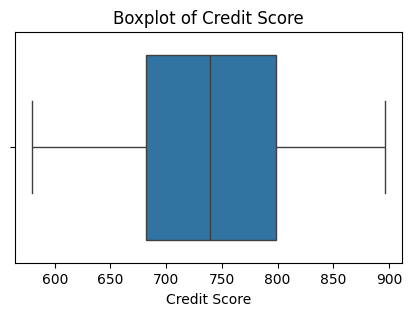

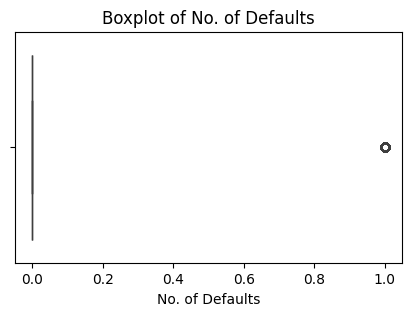

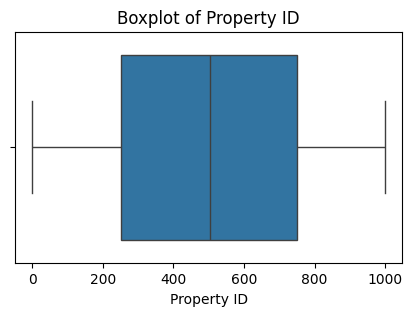

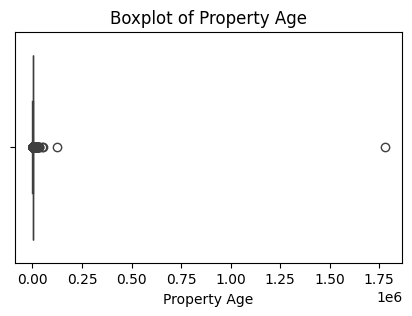

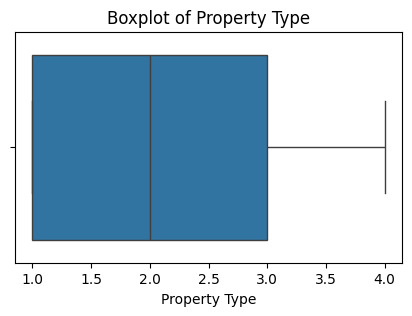

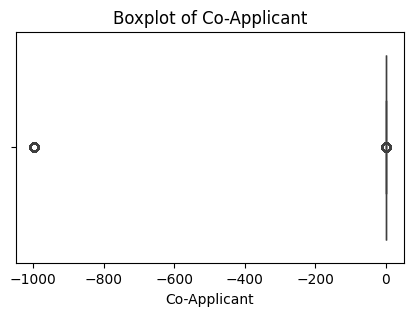

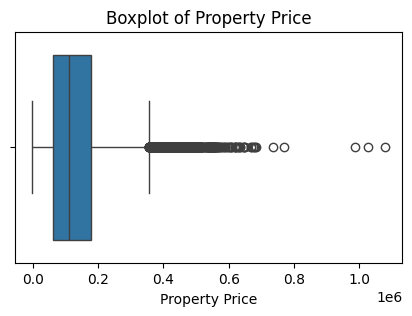

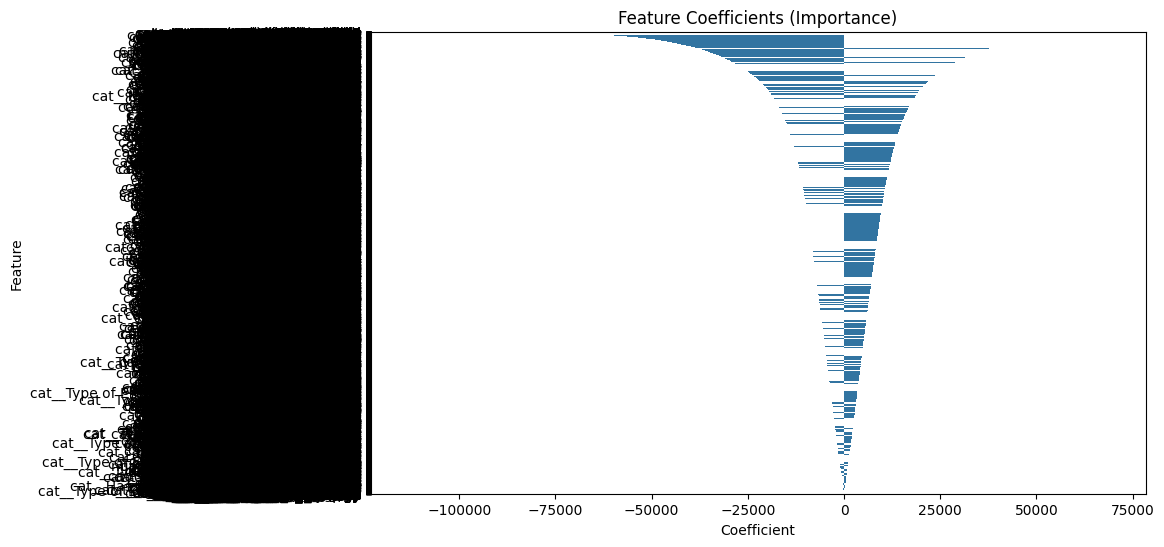

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



Cross-Validation Results Table:
      Fold       MAE           MSE      RMSE  R2 Score
0   Fold 1  21578.34  1.018976e+09  31921.40      0.55
1   Fold 2  21665.46  9.744009e+08  31215.40      0.57
2   Fold 3  21459.24  1.065668e+09  32644.58      0.54
3   Fold 4  21509.26  9.190397e+08  30315.67      0.62
4   Fold 5  21757.34  9.953722e+08  31549.52      0.58
5  Average  21593.93  9.946914e+08  31529.31      0.57


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
# -*- coding: utf-8 -*-


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

df=pd.read_csv('/content/drive/MyDrive/loantrain.csv')
df.head()
df.isnull().sum()

print("Dataset size after preprocessing:", df.shape[0])

target = 'Loan Sanction Amount (USD)'

categorical_features=df.select_dtypes(include=['object']).columns.tolist()
numerical_features=df.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_features=[col for col in numerical_features if target!=col]

numeric_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

categorical_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(drop='first',handle_unknown='ignore'))
])

preprocessor=ColumnTransformer([
    ('num',numeric_pipeline,numerical_features),
    ('cat',categorical_pipeline,categorical_features)
])

# Drop rows where the target value is missing
df = df.dropna(subset=['Loan Sanction Amount (USD)'])

X=df.drop(columns=target)
y=df[target]

X_train,X_temp,y_train,y_temp=train_test_split(X,y,random_state=42,test_size=0.3)
X_test,X_val,y_test,y_val=train_test_split(X,y,random_state=42,test_size=0.5)
model=Pipeline([
    ('preprocessor',preprocessor),
    ('regressor',LinearRegression())

])

model.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
y_val_pred=model.predict(X_val)

def evaluate(y_true,y_pred):
  print('MSE',mean_squared_error(y_true,y_pred))
  print('MAE',mean_absolute_error(y_true,y_pred))
  print('r2',r2_score(y_true,y_pred))

print('test')
evaluate(y_test, y_test_pred)
print('validation')
evaluate(y_val, y_val_pred)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate(y_true, y_pred, X_data):
    n = len(y_true)                    # number of samples
    k = X_data.shape[1]               # number of features (after encoding)

    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Adjusted R² formula
    adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

    print(f"MAE : {mae:.2f}")
    print(f"MSE : {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²  : {r2:.4f}")
    print(f"Adjusted R²: {adjusted_r2:.4f}")

print("Test Set Evaluation:")
evaluate(y_test, y_test_pred, X_test)

print("\nValidation Set Evaluation:")
evaluate(y_val, y_val_pred, X_val)

print("Dataset size after preprocessing:", df.shape[0])

plt.figure(figsize=(6,4))
sns.histplot(df[target], kde=True, bins=30)
plt.title('Distribution of Loan Amount')
plt.show()
# Correlation Heatmap
numeric_df = df.select_dtypes(include=['number'])
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
# Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Loan Amount')
plt.ylabel('Predicted Loan Amount')
plt.title('Actual vs Predicted')
plt.show()
# Residual Plot
residuals = y_test - y_test_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()
# Boxplots of numerical features
for col in numerical_features:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Feature Importance
model_coeff = model.named_steps['regressor'].coef_
feature_names = model.named_steps['preprocessor'].get_feature_names_out()

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model_coeff
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature')
plt.title('Feature Coefficients (Importance)')
plt.show()

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# 1. Remove any rows with NaNs in target
df_clean = df.dropna(subset=['Loan Sanction Amount (USD)'])

# 2. Define target and features
X = df_clean.drop(['Loan Sanction Amount (USD)'], axis=1)
y = df_clean['Loan Sanction Amount (USD)']

# Ensure y is numeric and has no NaNs
y = pd.to_numeric(y, errors='coerce')
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# 3. Apply KFold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
mae_list = []
mse_list = []
rmse_list = []
r2_list = []

fold = 1
results = []

for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    # Create and train pipeline
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])

    model.fit(X_train_cv, y_train_cv)
    y_pred_cv = model.predict(X_test_cv)

    # Compute metrics
    mae = mean_absolute_error(y_test_cv, y_pred_cv)
    mse = mean_squared_error(y_test_cv, y_pred_cv)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_cv, y_pred_cv)

    # Save to lists
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

    results.append([f"Fold {fold}", round(mae, 2), round(mse, 2), round(rmse, 2), round(r2, 2)])
    fold += 1

# 4. Compute averages
results.append(["Average",
                round(np.mean(mae_list), 2),
                round(np.mean(mse_list), 2),
                round(np.mean(rmse_list), 2),
                round(np.mean(r2_list), 2)])

# 5. Display as table
results_df = pd.DataFrame(results, columns=["Fold", "MAE", "MSE", "RMSE", "R2 Score"])
print("\nCross-Validation Results Table:")
print(results_df)